<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/03_neural_networks/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks (CNNs)

CNNs are specialized neural networks used primarily for image classification. They are designed to automatically and adaptively learn spatial hierarchies of features through filters/kernels.

In this notebook, you will:
- Understand what CNNs are
- Learn how convolution, pooling, and flattening work
- Build and train a CNN using TensorFlow/Keras
- Evaluate it on image classification (MNIST)

### **Import Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### **Load and Preprocess the MNIST Dataset**

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


### **Visualize Sample Images**

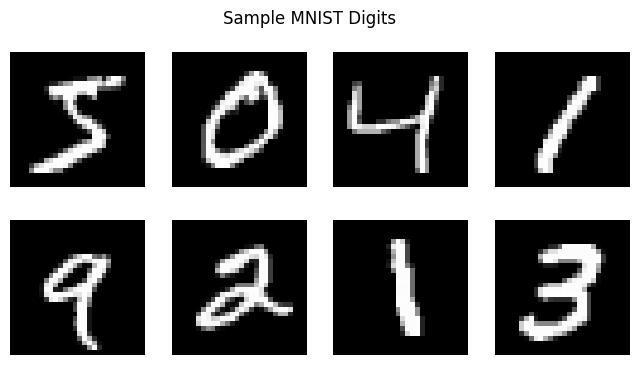

In [3]:
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

### **CNN Layers***

1. **Convolution** – Applies filters to detect features like edges, curves, textures
2. **ReLU** – Activation for non-linearity
3. **Max Pooling** – Downsamples feature maps, reduces computation
4. **Flatten** – Converts 2D to 1D
5. **Dense (Fully Connected)** – Final classification layer


### **Build the CNN Model**

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

### **Train the Model**

In [5]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
history

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.8717 - loss: 0.4340 - val_accuracy: 0.9837 - val_loss: 0.0555
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 51ms/step - accuracy: 0.9804 - loss: 0.0637 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9886 - loss: 0.0383 - val_accuracy: 0.9898 - val_loss: 0.0360
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9900 - val_loss: 0.0380
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9926 - loss: 0.0214 - val_accuracy: 0.9867 - val_loss: 0.0451


### **Plot Training History**

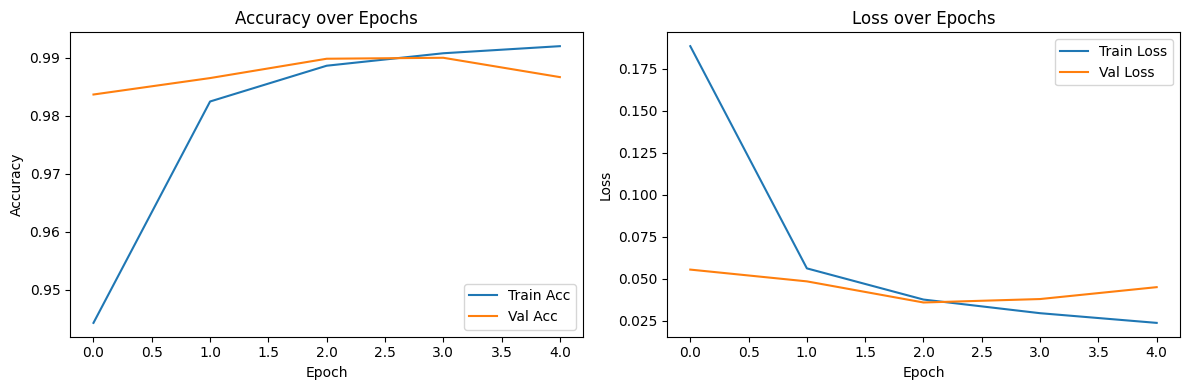

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### **Evaluate on Test Data**

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9868


### **Predict and Visualize Results**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


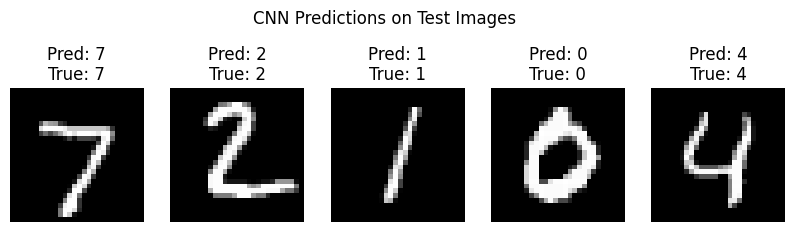

In [8]:
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis("off")
plt.suptitle("CNN Predictions on Test Images")
plt.show()

### **Summary**

- CNNs are powerful for handling image data.
- We built a CNN with convolution, pooling, and dense layers.
- The model achieved high accuracy on the MNIST dataset.

> Next: Try more complex datasets like CIFAR-10. Explore `rnn.ipynb` next.
